In [2]:
import numpy as np
import pandas as pd

In [3]:
datos = pd.read_csv('MCT.csv')
datos.head()

,id_anony,Cod.Car.Sec,tardoCB,PasoCB,recursadas_s1,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S
0,es_1815,MCT-PLS13,5,1,2,5.0,4.0,3.0,4.0,3.0,3.0,3.666667
1,es_1860,MCT-PLS13,7,1,1,2.5,2.0,3.0,4.0,3.0,5.0,3.142857
2,es_1948,MCT-PLS13,3,1,3,5.0,3.0,4.0,3.0,3.0,5.0,3.833333
3,es_1973,MCT-PLS13,5,1,0,3.0,3.0,3.0,3.0,5.0,5.0,3.666667
4,es_2008,MCT-PLS13,5,1,4,5.0,2.5,5.0,2.5,4.0,5.0,3.625000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

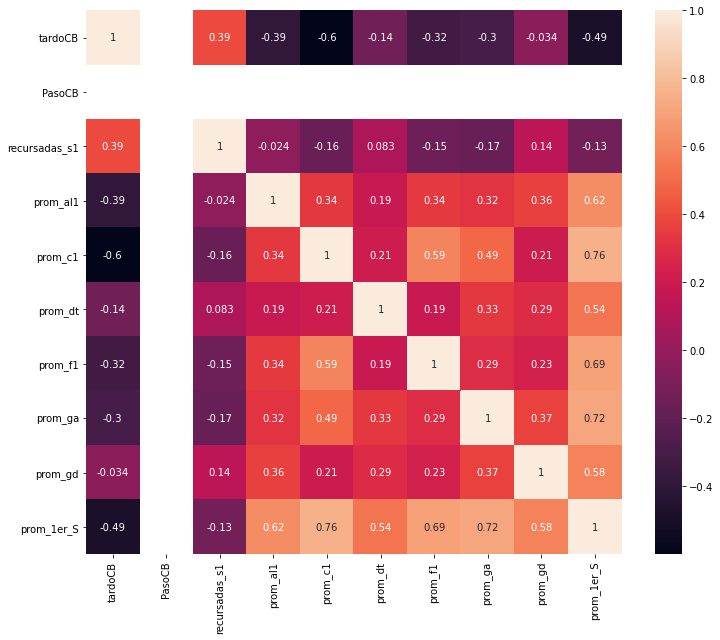

In [5]:
corr_df = datos.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_df, annot=True)
plt.show()

In [6]:
datos.describe()

,tardoCB,PasoCB,recursadas_s1,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S
count,87.000000,87.0,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,3.103448,1.0,0.218391,4.360153,3.503831,4.206897,3.729885,4.254789,4.350575,4.059136
std,1.285288,0.0,0.689207,0.948232,1.300461,1.033035,1.130457,1.070161,0.979781,0.718614
min,2.000000,1.0,0.000000,1.333333,1.333333,1.500000,2.000000,1.333333,1.500000,2.250000
25%,2.000000,1.0,0.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000,3.500000
50%,3.000000,1.0,0.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,4.166667
75%,4.000000,1.0,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.666667
max,7.000000,1.0,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


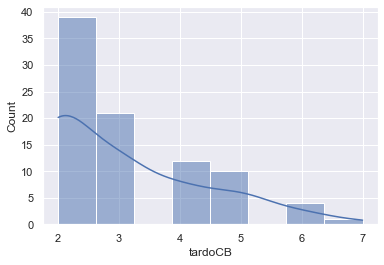

In [7]:
sns.set(style="darkgrid")
sns.histplot(data=datos, x="tardoCB",kde=True)
plt.show()

In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_anony       87 non-null     object 
 1   Cod.Car.Sec    87 non-null     object 
 2   tardoCB        87 non-null     int64  
 3   PasoCB         87 non-null     int64  
 4   recursadas_s1  87 non-null     int64  
 5   prom_al1       87 non-null     float64
 6   prom_c1        87 non-null     float64
 7   prom_dt        87 non-null     float64
 8   prom_f1        87 non-null     float64
 9   prom_ga        87 non-null     float64
 10  prom_gd        87 non-null     float64
 11  prom_1er_S     87 non-null     float64
dtypes: float64(7), int64(3), object(2)
memory usage: 7.5+ KB


<Figure size 864x720 with 0 Axes>

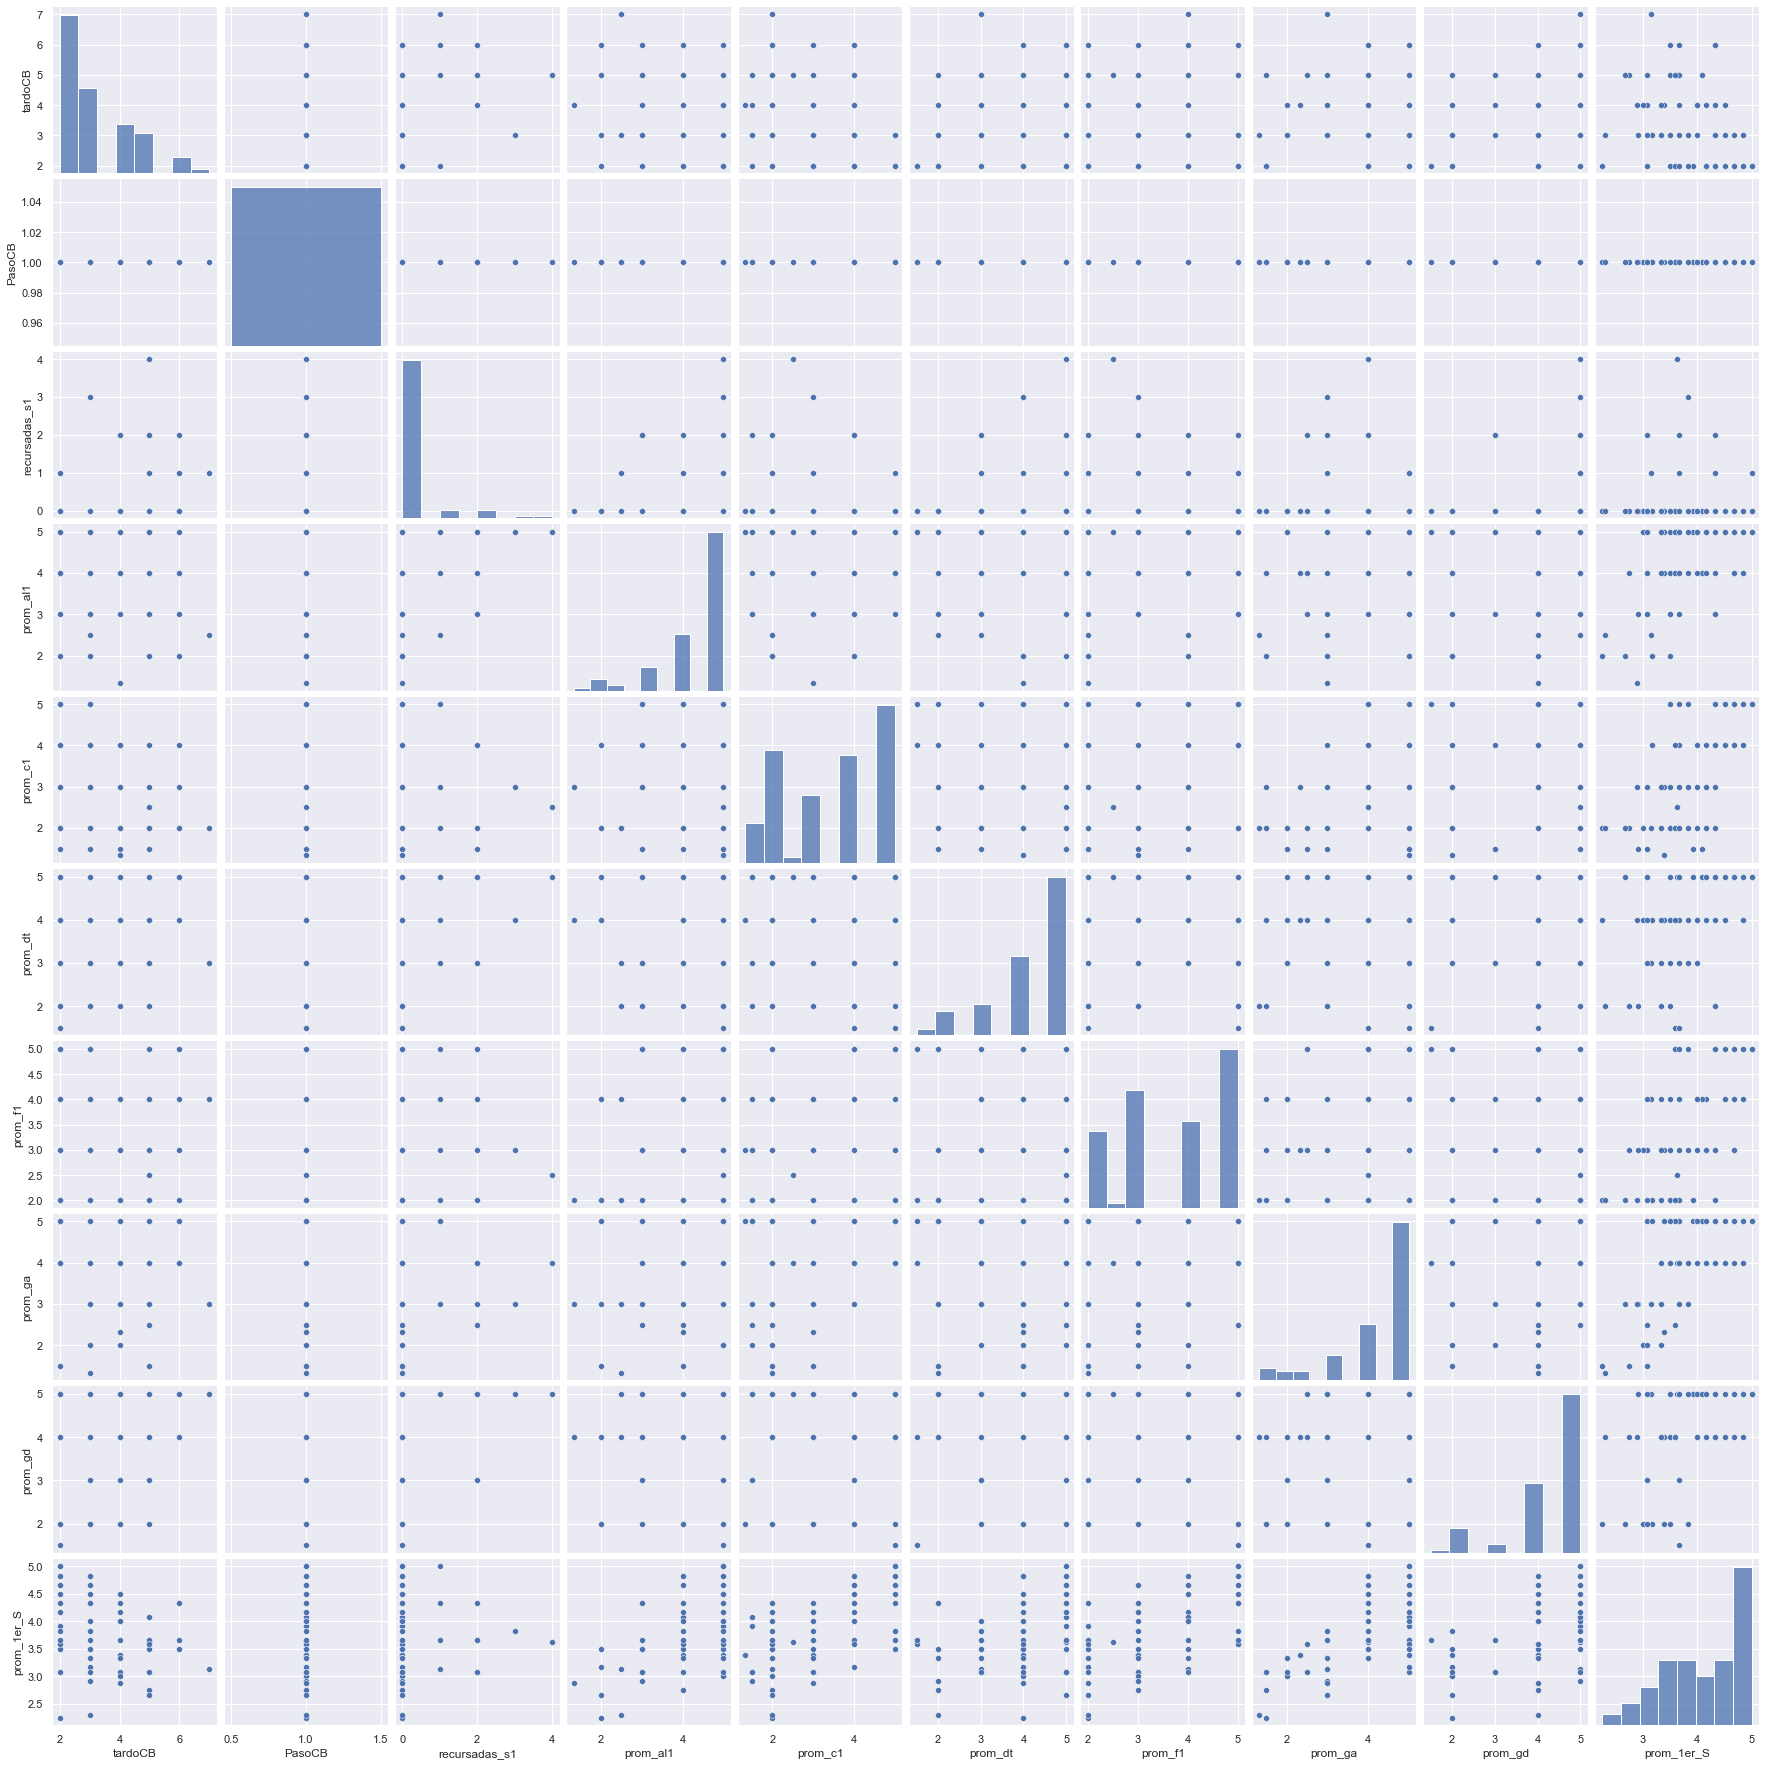

In [9]:
plt.figure(figsize=(12,10))
sns.pairplot(datos)
plt.show()

In [10]:
print(datos['tardoCB'].value_counts())

2    39
3    21
4    12
5    10
6     4
7     1
Name: tardoCB, dtype: int64


C:\Users\gonza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


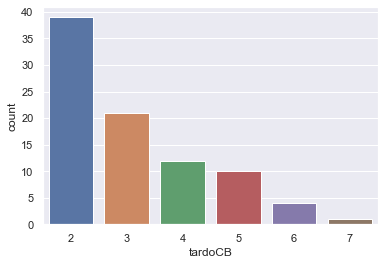

In [11]:
sns.countplot(datos['tardoCB'])
plt.show()

In [12]:
#models

In [14]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics, preprocessing

In [14]:
datos

,id_anony,Cod.Car.Sec,tardoCB,PasoCB,recursadas_s1,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S
0,es_1815,MCT-PLS13,5,1,2,5.0,4.0,3.0,4.0,3.0,3.0,3.666667
1,es_1860,MCT-PLS13,7,1,1,2.5,2.0,3.0,4.0,3.0,5.0,3.142857
2,es_1948,MCT-PLS13,3,1,3,5.0,3.0,4.0,3.0,3.0,5.0,3.833333
3,es_1973,MCT-PLS13,5,1,0,3.0,3.0,3.0,3.0,5.0,5.0,3.666667
4,es_2008,MCT-PLS13,5,1,4,5.0,2.5,5.0,2.5,4.0,5.0,3.625000
...,...,...,...,...,...,...,...,...,...,...,...,...
82,es_3867,MCT-PLS13,2,1,0,4.0,5.0,5.0,5.0,5.0,4.0,4.666667
83,es_3907,MCT-PLS13,2,1,0,4.0,5.0,5.0,5.0,5.0,5.0,4.833333
84,es_4037,MCT-PLS13,2,1,0,5.0,5.0,1.5,5.0,4.0,1.5,3.666667
85,es_4053,MCT-PLS13,2,1,0,4.0,5.0,3.0,5.0,4.0,2.0,3.833333


In [15]:
def clasear(x):
    if x<5:
        return int(x)
    else:
        return 5

In [16]:
datos['tardoCB'] = datos['tardoCB'].apply(clasear)

In [17]:
datos.to_csv('datos_finales.csv', index=False)
np.unique(datos['tardoCB'])

array([2, 3, 4, 5], dtype=int64)

In [19]:
target = 'tardoCB'
X = datos.drop(columns=[target,'id_anony','PasoCB','Cod.Car.Sec'])
y = pd.DataFrame(datos[target].values.astype(np.int64), columns=[target])
X.shape, y.shape

((87, 8), (87, 1))

In [20]:
X

,recursadas_s1,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S
0,2,5.0,4.0,3.0,4.0,3.0,3.0,3.666667
1,1,2.5,2.0,3.0,4.0,3.0,5.0,3.142857
2,3,5.0,3.0,4.0,3.0,3.0,5.0,3.833333
3,0,3.0,3.0,3.0,3.0,5.0,5.0,3.666667
4,4,5.0,2.5,5.0,2.5,4.0,5.0,3.625000
...,...,...,...,...,...,...,...,...
82,0,4.0,5.0,5.0,5.0,5.0,4.0,4.666667
83,0,4.0,5.0,5.0,5.0,5.0,5.0,4.833333
84,0,5.0,5.0,1.5,5.0,4.0,1.5,3.666667
85,0,4.0,5.0,3.0,5.0,4.0,2.0,3.833333


In [21]:
X[target] = pd.Series(y[target])
train, test = train_test_split(X, stratify=X[target], test_size=0.2, random_state=365)

In [22]:
train.shape, test.shape

((69, 9), (18, 9))

In [23]:
variables = ['recursadas_s1','prom_al1','prom_c1','prom_dt','prom_f1','prom_ga','prom_gd','prom_1er_S']
reg = LogisticRegression(max_iter=200)
reg.fit(train[variables], train[target])
reg_predictions = reg.predict(test[variables])

In [27]:
test.copy()
test.loc[:, ('reg-predicted')] = reg_predictions
test

C:\Users\gonza\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,recursadas_s1,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S,tardoCB,reg-predicted
64,0,4.0,5.0,5.0,5.0,5.0,5.0,4.833333,2,2
81,0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,2,2
48,0,5.0,2.0,4.0,3.0,4.0,5.0,3.833333,3,3
26,0,5.0,4.0,5.0,5.0,5.0,5.0,4.833333,3,2
82,0,4.0,5.0,5.0,5.0,5.0,4.0,4.666667,2,2
68,0,4.0,4.0,5.0,3.0,5.0,4.0,4.166667,2,2
29,0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,2,2
23,0,5.0,2.0,5.0,4.0,5.0,4.0,4.166667,2,3
69,0,2.0,4.0,4.0,2.0,5.0,2.0,3.166667,3,2
3,0,3.0,3.0,3.0,3.0,5.0,5.0,3.666667,5,3


In [28]:
acc = metrics.accuracy_score(reg_predictions, test[target])# precision
acc

0.5

In [29]:
def create_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Pred 2', 'Pred 3', 'Pred 4', 'Pred 5']
    cm_df = cm_df.rename(index={0: 'Actual 2', 1:'Actual 3', 2:'Actual 4', 3:'Actual 5'})
    return cm_df

In [30]:
create_confusion_matrix(train[target], train[target])

,Pred 2,Pred 3,Pred 4,Pred 5
Actual 2,31,0,0,0
Actual 3,0,17,0,0
Actual 4,0,0,9,0
Actual 5,0,0,0,12


In [31]:
create_confusion_matrix(test[target],test[target])

,Pred 2,Pred 3,Pred 4,Pred 5
Actual 2,8,0,0,0
Actual 3,0,4,0,0
Actual 4,0,0,3,0
Actual 5,0,0,0,3


In [32]:
create_confusion_matrix(test[target], reg_predictions)

,Pred 2,Pred 3,Pred 4,Pred 5
Actual 2,7,1,0,0
Actual 3,2,2,0,0
Actual 4,1,2,0,0
Actual 5,1,2,0,0


In [33]:
print(classification_report(test[target], reg_predictions, digits=4))

              precision    recall  f1-score   support

           2     0.6364    0.8750    0.7368         8
           3     0.2857    0.5000    0.3636         4
           4     0.0000    0.0000    0.0000         3
           5     0.0000    0.0000    0.0000         3

    accuracy                         0.5000        18
   macro avg     0.2305    0.3438    0.2751        18
weighted avg     0.3463    0.5000    0.4083        18



C:\Users\gonza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Regresion lineal
lr = LinearRegression()
lr.fit(train[variables], train[target])

lr_predictions = lr.predict(test[variables])

In [35]:
lr_predictions = [round(val, 0) for val in lr_predictions]

In [36]:
test.loc[:, ('lr-predicted')] = lr_predictions
test

C:\Users\gonza\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\gonza\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,recursadas_s1,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S,tardoCB,reg-predicted,lr-predicted
64,0,4.0,5.0,5.0,5.0,5.0,5.0,4.833333,2,2,3.0
81,0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,2,2,2.0
48,0,5.0,2.0,4.0,3.0,4.0,5.0,3.833333,3,3,3.0
26,0,5.0,4.0,5.0,5.0,5.0,5.0,4.833333,3,2,3.0
82,0,4.0,5.0,5.0,5.0,5.0,4.0,4.666667,2,2,3.0
68,0,4.0,4.0,5.0,3.0,5.0,4.0,4.166667,2,2,3.0
29,0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,2,2,2.0
23,0,5.0,2.0,5.0,4.0,5.0,4.0,4.166667,2,3,4.0
69,0,2.0,4.0,4.0,2.0,5.0,2.0,3.166667,3,2,3.0
3,0,3.0,3.0,3.0,3.0,5.0,5.0,3.666667,5,3,4.0


In [37]:
create_confusion_matrix(test[target], lr_predictions)

,Pred 2,Pred 3,Pred 4,Pred 5
Actual 2,3,4,1,0
Actual 3,0,4,0,0
Actual 4,1,2,0,0
Actual 5,0,2,1,0


In [38]:
reg_acc = metrics.accuracy_score(reg_predictions, test[target])
lr_acc = metrics.accuracy_score(lr_predictions, test[target])
print("Precisiones:")
print('lineal: %.4f, logistica: %.4f' % (lr_acc, reg_acc))

Precisiones:
lineal: 0.3889, logistica: 0.5000
